# Interacting, reading, writing files in python
## Contents
- basic access
- csvs
- regex

In [58]:
import numpy
import pandas
import os

***
***

## Basic Access

Files can be opened with the builtin function `open`. We must specify what we want to do with that file, eg. read, write.

In [1]:
help(open)

Help on built-in function open in module io:

open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)
    Open file and return a stream.  Raise OSError upon failure.
    
    file is either a text or byte string giving the name (and the path
    if the file isn't in the current working directory) of the file to
    be opened or an integer file descriptor of the file to be
    wrapped. (If a file descriptor is given, it is closed when the
    returned I/O object is closed, unless closefd is set to False.)
    
    mode is an optional string that specifies the mode in which the file
    is opened. It defaults to 'r' which means open for reading in text
    mode.  Other common values are 'w' for writing (truncating the file if
    it already exists), 'x' for creating and writing to a new file, and
    'a' for appending (which on some Unix systems, means that all writes
    append to the end of the file regardless of the current seek position

### Reading a file:
1. Open the file
2. Read its lines
3. Parse whatever you want from those lines
4. Close it

In [14]:
# open it with read permissions
myfile = open('example.txt', 'r')

In [15]:
# read it
lines = myfile.readlines()

In [16]:
# close it
myfile.close()

__Note__: for very large files, or ones which the information you care about is at the start, see `readline` to read one line at a time instead of loading the whole file into memory.

In [17]:
print(f'Number of lines read: {len(lines)}')

Number of lines read: 16


In [22]:
lines

['This is a file I just made up.\n',
 '\n',
 'I am going to ramble on about some random stuff.\n',
 '\n',
 'Here is another sentence.\n',
 '\n',
 'Below is some data:\n',
 '1\n',
 '2\n',
 '3\n',
 '2\n',
 '3\n',
 '1\n',
 '4\n',
 'End of data.\n',
 'End of file.']

> It is a list of lines! The `\n` is a string that indicates a new line in the file eg. an "enter"

In [19]:
for line in lines:
    print(line)

This is a file I just made up.



I am going to ramble on about some random stuff.



Here is another sentence.



Below is some data:

1

2

3

2

3

1

4

End of data.

End of file.


***
__Let's get some data from it.__

In [33]:
found_data = False
data = []
for line in lines:
    # start counting when we find data
    if line.startswith('Below is'):
        found_data = True
        continue                    # skip this line
    elif line.startswith('End of data'):
        break                       # we are done, break out of loop
    
    # once we've found data start recording
    if found_data:
        data.append(line.split()[0])
data = numpy.array(data).astype(int)

In [34]:
data

array([1, 2, 3, 2, 3, 1, 4])

***
__A more complex case__

In [50]:
def load_xyz(filename):
    """Reads information from an xyz file.
    input : str, path to xyz
    returns: 
        list : atom symbols
        array : atom positions
    """
    try:
        isinstance(filename,str)
    except:
        print("Missing filename - data can't be loaded!!", sys.exc_info()[0])
        raise
    xfile = open(filename, "r")
    lists = [line.strip().split() for line in xfile.readlines()]
    xfile.close()
    
    natoms_file=int(lists[0][0])
    natoms_parsed=len(lists)-2

    assert natoms_file == natoms_parsed,\
        "Atom number in xyz file does not match number of atoms!"

    atom_name_list=[]
    coords_list=[]

    for i in range(2, int(natoms_file)+2):
        atom_name_list.append(lists[i][0])
        coords_tmp = [float(item) for item in lists[i][-3:]]
        coords_list.append((coords_tmp))
    
    positions = numpy.array(coords_list)
    
    return atom_name_list, positions

In [51]:
atoms, positions = load_xyz('example.xyz')

In [54]:
atoms

['O', 'O', 'H', 'H']

In [55]:
positions

array([[ 0.76084126, -0.20911844,  0.08146159],
       [-0.76085258, -0.21718893, -0.05653419],
       [ 0.96664141, -0.49708866, -0.85567805],
       [-0.96663602, -0.39408615,  0.90776292]])

### Writing to file:
1. Open it
2. Write your lines
3. close it

In [35]:
myfile = open('myfile.dat', 'w')

In [37]:
for datapoint in data:
    # files can only contain strings, so we have to convert
    myfile.write(str(datapoint))

In [38]:
myfile.close()

> It just pasted them all in one line, when we propbably want to store each datapoint seperately!

In [44]:
os.remove('myfile.dat')

In [45]:
myfile = open('myfile.dat', 'w')

In [46]:
for datapoint in data:
    # files can only contain strings, so we have to convert
    myfile.write(str(datapoint))
    myfile.write('\n')

In [47]:
myfile.close()

In [48]:
os.remove('myfile.dat')

***
***

## Pandas and csv files

Pandas is a python library that was created to handle data, and it is a very useful tool for that purpose. Let's say we have an a number of dependant variables, we would like to represent different datapoints for those variables as an excel-like

In [59]:
df = pandas.DataFrame({
    'x': data
})

In [60]:
df 

,x
0,1
1,2
2,3
3,2
4,3
5,1
6,4


Add another variable.

In [61]:
df['y'] = df['x'].apply(lambda x: x**2+1)

In [62]:
df

,x,y
0,1,2
1,2,5
2,3,10
3,2,5
4,3,10
5,1,2
6,4,17


> We have an x and a y variable related to eachother, and we have 7 datapoints. We can have as long and as wide a dataframe as we want.

### Tangent: Pandas can do a ton of cool shit

We can get stats on our data

In [63]:
df.describe()

,x,y
count,7.000000,7.000000
mean,2.285714,7.285714
std,1.112697,5.407226
min,1.000000,2.000000
25%,1.500000,3.500000
50%,2.000000,5.000000
75%,3.000000,10.000000
max,4.000000,17.000000


We can plot it

<AxesSubplot:xlabel='x', ylabel='y'>

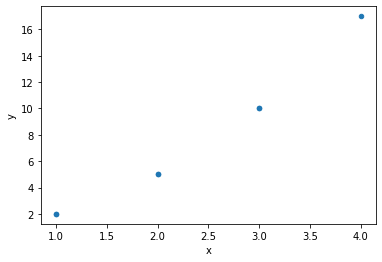

In [68]:
df.plot.scatter(x='x', y='y')

We can bin it

In [75]:
df.groupby(
    pandas.cut(df['y'], bins=5)
).count()

,x,y
y,,
"(1.985, 5.0]",4,4
"(5.0, 8.0]",0,0
"(8.0, 11.0]",2,2
"(11.0, 14.0]",0,0
"(14.0, 17.0]",1,1


And on and on...

### Back on track: save our data as csv, load a csv
Its super easy.

In [76]:
df.to_csv('mydata.csv')

In [78]:
another_df = pandas.read_csv('mydata.csv', index_col=0)
another_df

,x,y
0,1,2
1,2,5
2,3,10
3,2,5
4,3,10
5,1,2
6,4,17


***
## Regex: find patterns in text

In [79]:
import re

In [80]:
toy_string = """
Stuff I don't care about
------------------------
>> Some more things
None
Of
This
Matters

| Data |
    1
    2
    5
    1

------------------------
Other Things
>> Don't care
Total value: 20.1

Thank you for looking at this string
End of file.
"""

We can extract things from this file by defining patters

In [89]:
value_pattern = 'Total value: (.*)'

- The first part of the patter is just a literal, as in the pattern only matches the string if it has those characters in it
- The parenthasis mean give me whats in side
- The `.` matches any character and the `*` means repeat until end of line, so .* means everything until the end of line

In [91]:
re.findall(
    value_pattern,
    toy_string
)

['20.1']

In [151]:
data_pattern = '(?<=/| Data /|)(.*)(?=\n\n)'
data_pattern = '\| Data \|([\S\s]*?)(?=\n\n)'

In [155]:
out = re.findall(
    data_pattern,
    toy_string
)[0]

In [156]:
out.split()

['1', '2', '5', '1']

- `\| Data \|` is literal, \ is used because | is a special character, and we want to look for the |'s in the string
- `([\S\s]*?)` means match everything __including new lines__, the ? at the end means match until the next pattern is matched for __the first time__, if that wasn't there it would capture eveything until __the last__ match of the next pattern
- `(?=\n\n)` means match everything __behind__ two new lines

> regex is basically its own language, so there is a lot to learn, but can be very helpful